# Notebook for Assignment #2

## Beginning by getting things set up

In [1]:
# Methods for display of arbitrary HTML
from IPython.display import HTML

# Methods for capture of secure info (like registration keys)
import getpass

# Methods for capture of data returned by GET request
import requests

# Methods for turning API result into pandas DataFrame
import json
import numpy as np
import pandas as pd

# Methods for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# setting the font size
plt.rcParams['font.size'] = 18

# Display result in an iframe
def show_iframe(url, height=400, width=1000):
    display_string = '<iframe src={url} width={w} height={h}></iframe>'.format(url=url, w=width, h=height)
    print(display_string)
    return HTML(display_string)

show_iframe('https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000', height=100)

<iframe src=https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000 width=1000 height=100></iframe>


In [2]:
reg_key = getpass.getpass('Enter Registration Key: ')

Enter Registration Key: ········


## Data Exploration

Starting with share of income to certain items

In [513]:
# path to dataset
path = '/Users/Athena/MSFS/Spring 2018/MSFS 607/Assignment Work Folder/Assignment 2/Data/share_exp_quin_2016.csv'

In [514]:
share_exp_quin_df = pd.read_csv(path) 

In [515]:
share_exp_quin_df.set_index('Unnamed: 0', inplace=True)

In [516]:
share_exp_quin_df

,lowest_20_percent,second_20_percent,third_20_percent,fourth_20_percent,highest_20-percent
Unnamed: 0,,,,,
Food,15.4,13.5,13.1,13.0,11.2
Alcoholic beverages,0.6,0.7,0.7,0.9,1.0
Housing,40.8,36.9,34.2,31.9,30.0
Apparel and services,3.4,3.2,3.2,3.0,3.1
Transportation,15.0,16.3,17.8,16.8,14.4
Healthcare,8.6,9.6,9.0,8.4,6.8
Entertainment,4.6,4.8,4.9,5.3,5.2
Personal care products and services,1.3,1.3,1.2,1.2,1.2
Reading,0.3,0.2,0.2,0.2,0.2


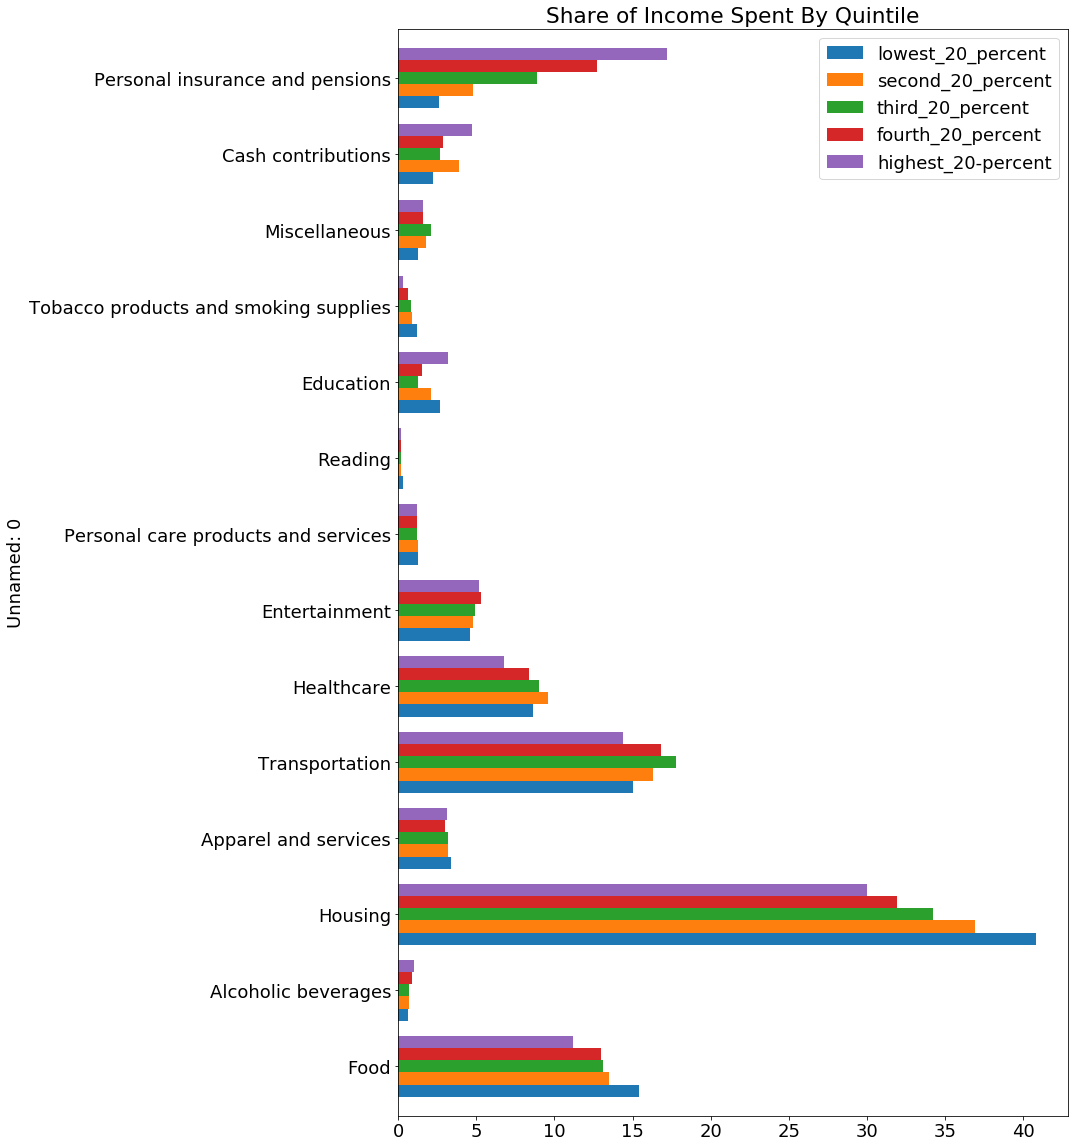

In [519]:
# create quick horizontal bar chart from share_exp_quin_df
share_exp_quin_df.plot(kind='barh', figsize=(12,20), width = .8, title='Share of Income Spent By Quintile', fontsize=18)

Now taking a look at mean expenditure by quintile

In [520]:
path2 = '/Users/Athena/MSFS/Spring 2018/MSFS 607/Assignment Work Folder/Assignment 2/Data/\
mean_annual_exp_quintile_2016.csv'

In [521]:
mean_exp_quin_df = pd.read_csv(path2) 

In [522]:
mean_exp_quin_df.set_index('Unnamed: 0', inplace=True)

In [523]:
mean_exp_quin_df

,lowest_20_percent,second_20_percent,third_20_percent,fourth_20_percent,highest_20-percent
Unnamed: 0,,,,,
Food,3862,4978,6224,8436,12513
Alcoholic beverages,158,261,350,569,1082
Housing,10267,13552,16315,20687,33653
Apparel and services,860,1164,1519,1959,3511
Transportation,3767,5992,8464,10931,16114
Healthcare,2156,3528,4266,5442,7677
Entertainment,1146,1783,2344,3409,5888
Personal care products and services,333,490,569,777,1364
Reading,64,86,96,115,229


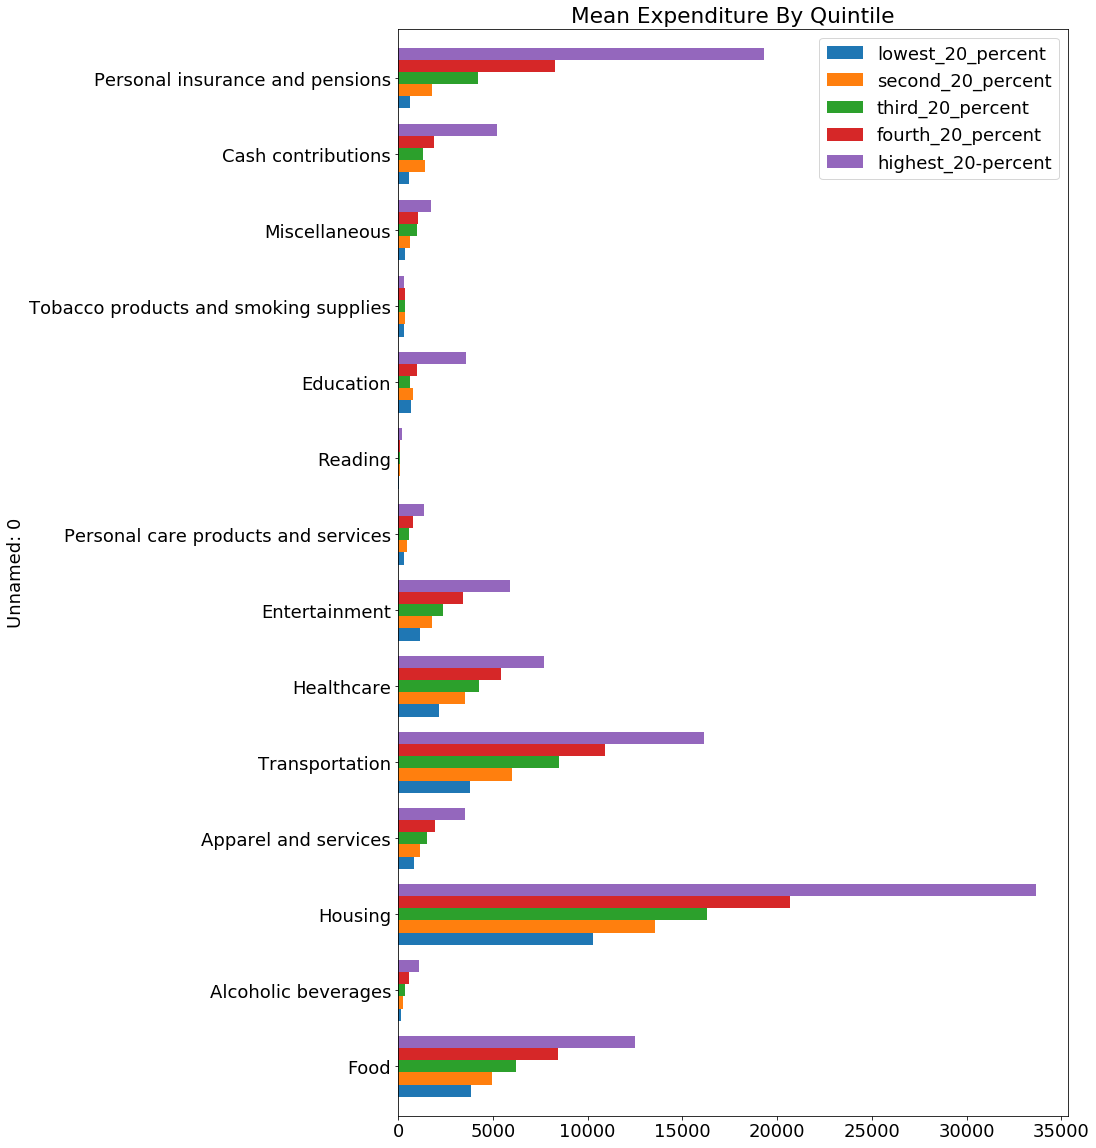

In [525]:
# Creating quick chart for mean expenditure by quintile
mean_exp_quin_df.plot(kind='barh', figsize=(12,20), width = .8, title='Mean Expenditure By Quintile', fontsize=18)

A few things stand out here. The highest quintile spends a lot more on Housing, Food, Transportation, Healthcare, Education, Cash Contributions, and Personal Insurance and Pensions. These are a lot to talk about in 3-5 slides, so I'll focus on the items that have been growing consistently over the last decade (see below).

While I'll start with Pensions and Social Security, I do not think I will use it since it really doesn't cover the type of consumption that seems most germane to this assignment.

### Pensions and Social Security

- Prefix: CX
- Seasonal Adjustment: U
- Item: INSPENSN
- Demographic: LB01
- Characteristic code: 06
- Process: M

CXUINSPENSNLB0106M

In [3]:
series = ['CXUINSPENSNLB0106M']

In [4]:
# Creating function to capture data from BLS API moving forward
def capture_data(series, start, end, key=reg_key):
    headers = {'Content-type': 'application/json'}
    
    data = json.dumps({
        "seriesid": series,
        "startyear":str(start),
        "endyear":str(end),
        "registrationkey":str(key)
    })
    
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    return json.loads(p.text)

In [5]:
json_data = capture_data(series, 2000, 2016)

In [6]:
pension_df = pd.DataFrame(json_data['Results']['series'][0]['data'])

In [7]:
pension_df_sub = pension_df[['value','year']].astype(int)

# Set year to index
pension_df_sub.set_index('year', inplace=True)

# Sort index
pension_df_sub.sort_index(inplace=True)

pension_df_sub

,value
year,
2000,11557
2001,11878
2002,11967
2003,12615
2004,12632
2005,13862
2006,13800
2007,14050
2008,15126


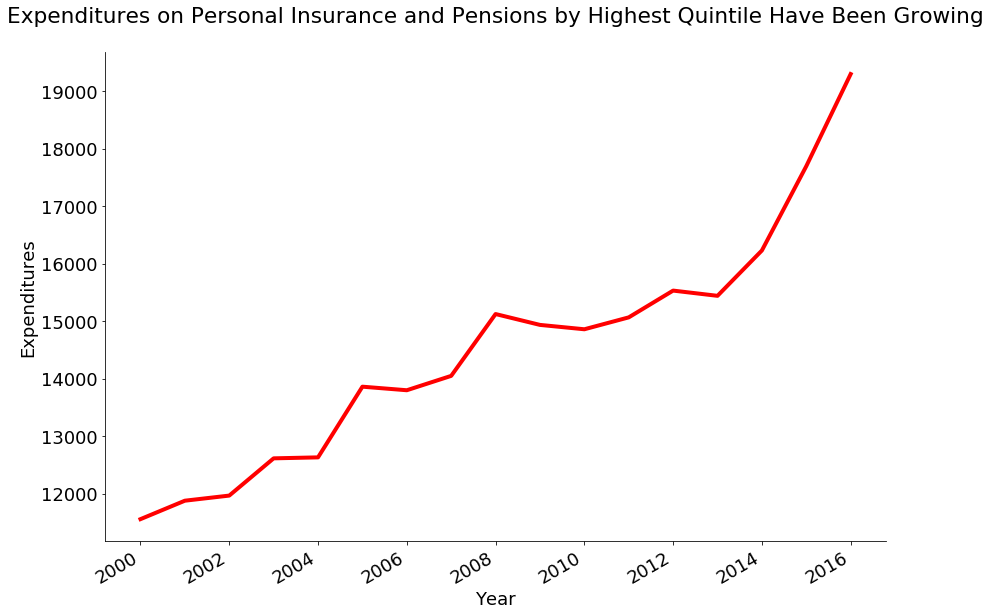

In [8]:
# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

# plotting the figure
ax.plot(pension_df_sub.index, pension_df_sub.value, 'r-', linewidth=4)

# labeling the axes
ax.set_xlabel('Year')
ax.set_ylabel('Expenditures')
ax.set_title('Expenditures on Personal Insurance and Pensions by Highest Quintile Have Been Growing\n')

# tilting the date in the x axis
fig.autofmt_xdate()

# removing clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Importing data on top six series: Education, Entertainment, Healthcare, Transportation, Housing, Food for Top Quintile

Within food, I'll also import data on (1) food away

### Education

- Prefix: CX
- Seasonal Adjustment: U
- Item: EDUCATN
- Demographic: LB01
- Characteristic code: 06
- Process: M

In [9]:
edu_series = ['CXUEDUCATNLB0106M']

In [10]:
edu_data = capture_data(edu_series, 2006, 2016)

In [11]:
edu_df = pd.DataFrame(edu_data['Results']['series'][0]['data'])

In [12]:
edu_df_sub = edu_df[['value','year']].astype(int)

# Set year to index
edu_df_sub.set_index('year', inplace=True)

# Sort index
edu_df_sub.sort_index(inplace=True)

edu_df_sub

,value
year,
2006,2281
2007,2541
2008,2899
2009,2966
2010,3005
2011,2585
2012,3399
2013,2932
2014,3227


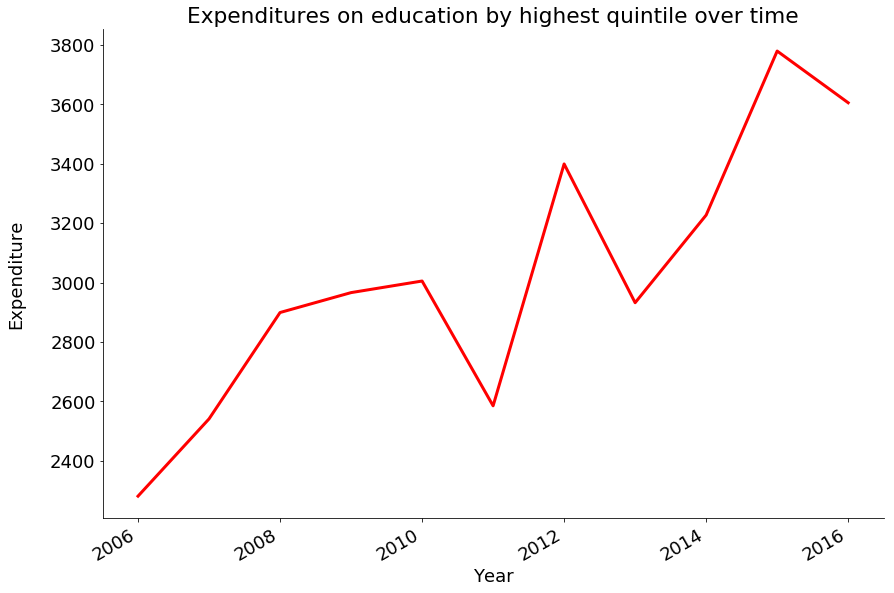

In [394]:
# setting axes 
x = edu_df_sub.index
y = edu_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure\n')
ax.set_title("Expenditures on education by highest quintile over time")

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [14]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(edu_df_sub.iloc[10,0] - edu_df_sub.iloc[0,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(edu_df_sub.iloc[10,0] \
            - edu_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

1324


Expenditure change between 2014 and 2016: 

378


### Next, entertainment

- Prefix: CX
- Seasonal Adjustment: U
- Item: ENTRTAIN
- Demographic: LB01
- Characteristic code: 06
- Process: M

CXUENTRTAINLB0106M

In [15]:
entertainment_series = ['CXUENTRTAINLB0106M']

In [16]:
entertainment_data = capture_data(entertainment_series, 2006, 2016)

In [17]:
entertainment_df = pd.DataFrame(entertainment_data['Results']['series'][0]['data'])

In [18]:
entertainment_df_sub = entertainment_df[['value','year']].astype(int)

# Set year to index
entertainment_df_sub.set_index('year', inplace=True)

# Sort index
entertainment_df_sub.sort_index(inplace=True)

entertainment_df_sub

,value
year,
2006,5105
2007,5921
2008,5673
2009,5474
2010,5277
2011,5027
2012,5444
2013,5133
2014,5629


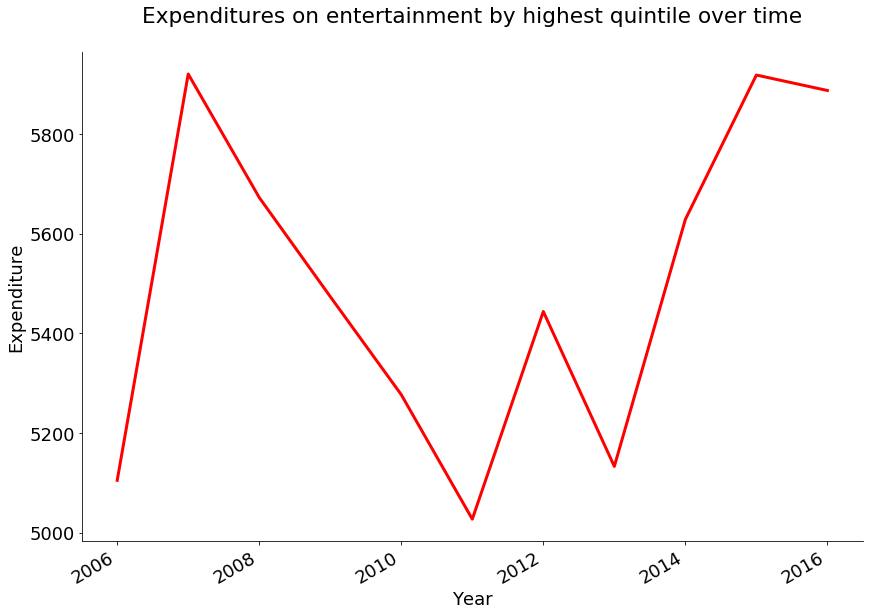

In [395]:
# setting axes 
x = entertainment_df_sub.index
y = entertainment_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure')
ax.set_title("Expenditures on entertainment by highest quintile over time\n")
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [20]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(entertainment_df_sub.iloc[10,0] \
            - entertainment_df_sub.iloc[0,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(entertainment_df_sub.iloc[10,0] \
            - entertainment_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

783


Expenditure change between 2014 and 2016: 

259


### Healthcare

+ Prefix: CX
+ Seasonal Adjustment: U
+ Item: HEALTH
+ Demographic: LB01
+ Characteristic code: 06
+ Process: M

CXUHEALTHLB0106M

In [21]:
health_series = ['CXUHEALTHLB0106M']

In [22]:
health_data = capture_data(health_series, 2006, 2016)

In [23]:
health_df = pd.DataFrame(health_data['Results']['series'][0]['data'])

In [24]:
health_df_sub = health_df[['value','year']].astype(int)

# Set year to index
health_df_sub.set_index('year', inplace=True)

# Sort index
health_df_sub.sort_index(inplace=True)

health_df_sub

,value
year,
2006,4086
2007,4244
2008,4391
2009,4677
2010,4827
2011,5149
2012,5785
2013,5755
2014,7219


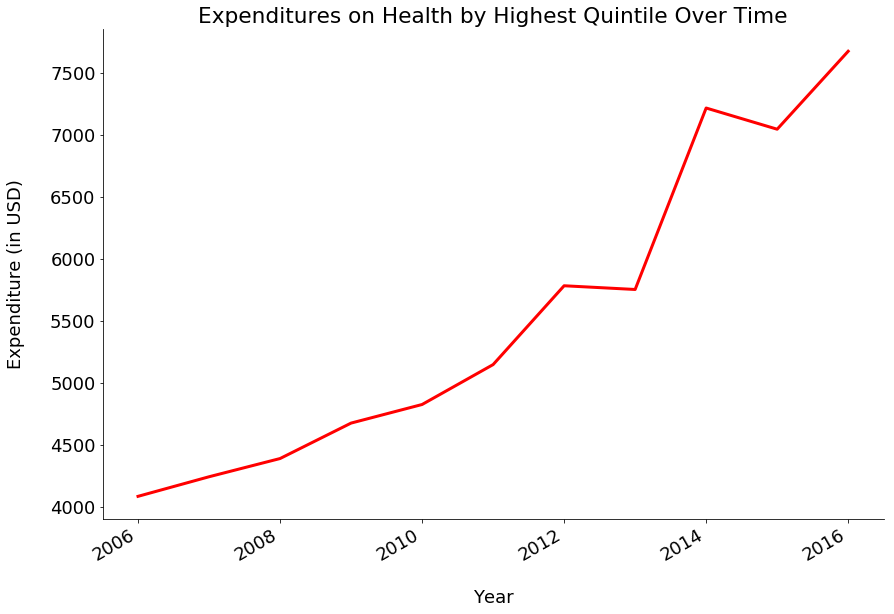

In [440]:
# setting axes 
x = health_df_sub.index
y = health_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('\nYear')
ax.set_ylabel('Expenditure (in USD)\n')
ax.set_title("Expenditures on Health by Highest Quintile Over Time")

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving the fig
plt.savefig(fig_dir+'health_exp_by_highest_quintile_over_time.png', dpi=300, bbox_inches='tight')

In [26]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(health_df_sub.iloc[10,0] \
            - health_df_sub.iloc[0,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(health_df_sub.iloc[10,0] \
            - health_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

3591


Expenditure change between 2014 and 2016: 

458


### Transportation

+ Prefix: CX
+ Seasonal Adjustment: U
+ Item: TRANS
+ Demographic: LB01
+ Characteristic code: 06
+ Process: M

CXUTRANSLB0106M

In [388]:
transportation_series = ['CXUTRANSLB0106M']

In [389]:
transportation_data = capture_data(transportation_series, 2006, 2016)
#trans_data

In [390]:
transportation_df = pd.DataFrame(transportation_data['Results']['series'][0]['data'])

In [391]:
transportation_df_sub = transportation_df[['value','year']].astype(int)

# Set year to index
transportation_df_sub.set_index('year', inplace=True)

# Sort index
transportation_df_sub.sort_index(inplace=True)

transportation_df_sub

,value
year,
2006,16426
2007,15831
2008,15614
2009,14105
2010,13924
2011,15264
2012,16344
2013,16860
2014,16788


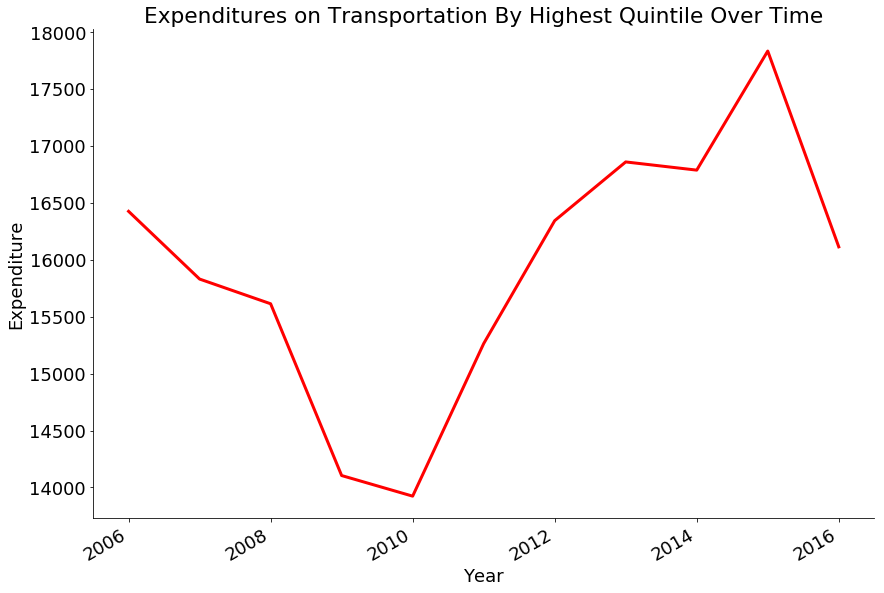

In [392]:
# setting axes 
x = transportation_df_sub.index
y = transportation_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure')
ax.set_title("Expenditures on Transportation By Highest Quintile Over Time")

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [32]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(trans_df_sub.iloc[10,0] \
            - trans_df_sub.iloc[0,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(trans_df_sub.iloc[10,0] \
            - trans_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

-312


Expenditure change between 2014 and 2016: 

-674


### Total food spending

- Prefix: CX
- Seasonal Adjustment: U
- Item: FOODTOTL
- Demographic: LB01
- Characteristic code: 06
- Process: M

CXUFOODTOTLLB0106M

In [33]:
food_series = ['CXUFOODTOTLLB0106M']

In [34]:
food_data = capture_data(food_series, 2006, 2016)

In [35]:
food_df = pd.DataFrame(food_data['Results']['series'][0]['data'])

In [36]:
food_df_sub = food_df[['value','year']].astype(int)

# Set year to index
food_df_sub.set_index('year', inplace=True)

# Sort index
food_df_sub.sort_index(inplace=True)

food_df_sub

,value
year,
2006,10243
2007,10444
2008,10982
2009,10780
2010,10676
2011,10991
2012,11334
2013,11184
2014,11595


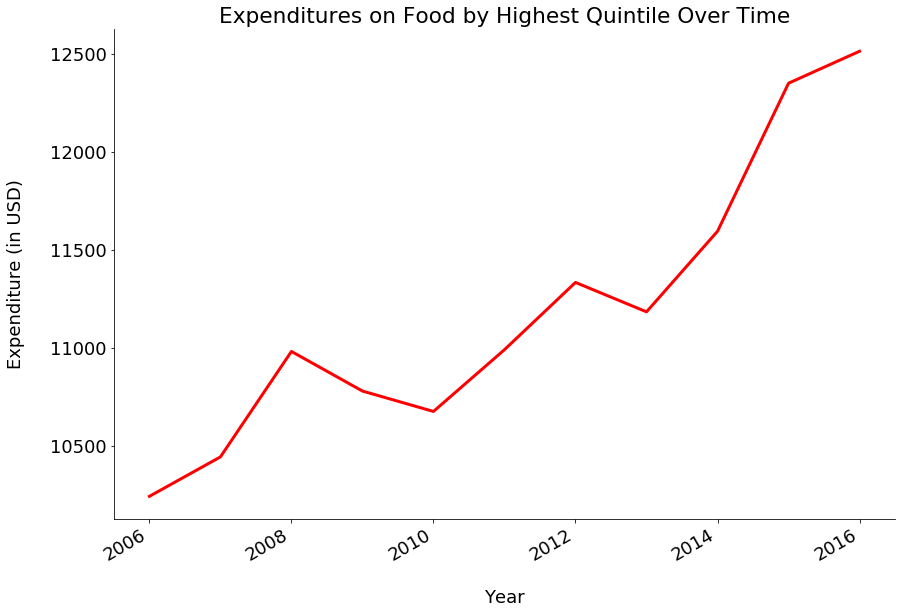

In [439]:
# setting axes 
x = food_df_sub.index
y = food_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('\nYear')
ax.set_ylabel('Expenditure (in USD)\n')
ax.set_title('Expenditures on Food by Highest Quintile Over Time')

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving the fig
plt.savefig(fig_dir+'food_exp_by_highest_quintile_over_time.png', dpi=300, bbox_inches='tight')

In [38]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(food_df_sub.iloc[10,0] \
            - food_df_sub.iloc[0,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(food_df_sub.iloc[10,0] \
            - food_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

2270


Expenditure change between 2014 and 2016: 

918


### Housing

- Prefix: CX
- Seasonal Adjustment: U
- Item: HOUSING
- Demographic: LB01
- Characteristic code: 06
- Process: M

CXUHOUSINGLB0106M

In [39]:
housing_series = ['CXUHOUSINGLB0106M']

In [40]:
housing_data = capture_data(housing_series, 2006, 2016)

In [41]:
housing_df = pd.DataFrame(housing_data['Results']['series'][0]['data'])

In [42]:
housing_df_sub = housing_df[['value','year']].astype(int)

# Set year to index
housing_df_sub.set_index('year', inplace=True)

# Sort index
housing_df_sub.sort_index(inplace=True)

housing_df_sub

,value
year,
2006,30071
2007,31492
2008,30791
2009,29998
2010,29615
2011,29321
2012,29705
2013,30901
2014,31812


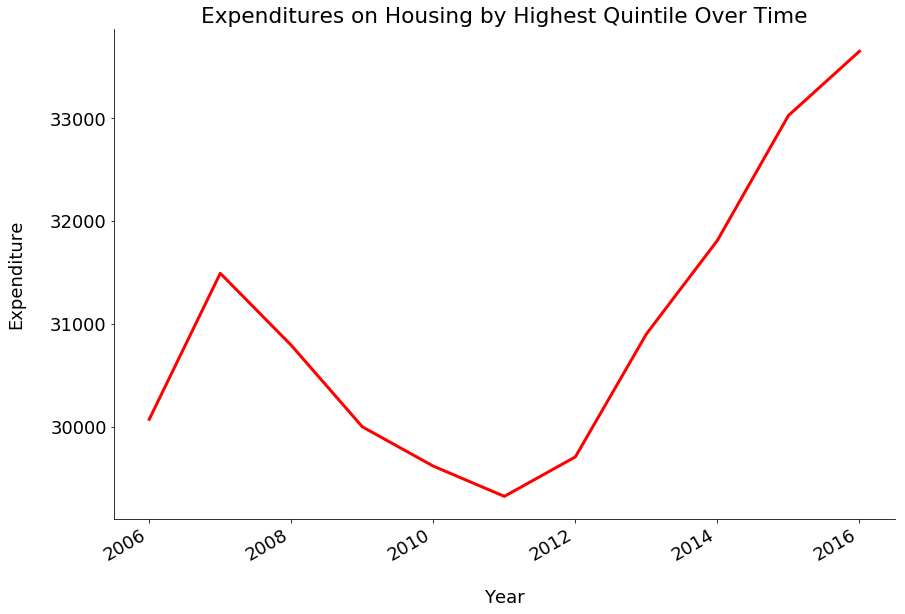

In [438]:
# setting axes 
x = housing_df_sub.index
y = housing_df_sub.values

# creating the chart
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(x, y, 'r-', linewidth=3)

# setting the labels for the whole plot
ax.set_xlabel('\nYear')
ax.set_ylabel('Expenditure\n')
ax.set_title("Expenditures on Housing by Highest Quintile Over Time")

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing border clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving the fig
plt.savefig(fig_dir+'housing_exp_by_highest_quintile_over_time.png', dpi=300, bbox_inches='tight')

In [44]:
print("\nExpenditure change between 2006 and 2016: " + "\n\n" + str(housing_df_sub.iloc[10,0] \
            - housing_df_sub.iloc[0,0]) + "\n")

print("Expenditure change between 2011 and 2016: " + "\n\n" + str(housing_df_sub.iloc[10,0] \
            - housing_df_sub.iloc[5,0]) + "\n")

print("\nExpenditure change between 2014 and 2016: " + "\n\n" + str(housing_df_sub.iloc[10,0] \
            - housing_df_sub.iloc[8,0]))


Expenditure change between 2006 and 2016: 

3582

Expenditure change between 2011 and 2016: 

4332


Expenditure change between 2014 and 2016: 

1841


As the chart above shows, housing expenditure has definitely been rising quickly over time for highest quintile. In addition, housing expenditures are \$3,582 higher than they were in 2006, and \$4,332 higher than the nadir in 2011.




### Food away from home

- Prefix: CX
- Seasonal Adjustment: U
- Item: FOODAWAY
- Demographic: LB01
- Characteristic code: 06
- Process: M

In [45]:
food_away_series = ['CXUFOODAWAYLB0106M']

In [46]:
food_away_data = capture_data(food_away_series, 2006, 2016)

In [47]:
food_away_df = pd.DataFrame(food_away_data['Results']['series'][0]['data'])

In [48]:
food_away_df_sub = food_away_df[['value','year']].astype(int)

# Set year to index
food_away_df_sub.set_index('year', inplace=True)

# Sort index
food_away_df_sub.sort_index(inplace=True)

food_away_df_sub

,value
year,
2006,5058
2007,5179
2008,5336
2009,5151
2010,4993
2011,5163
2012,5366
2013,5125
2014,5555


###  Going to combine Food (Total) and Food (away from home) in highest quintile

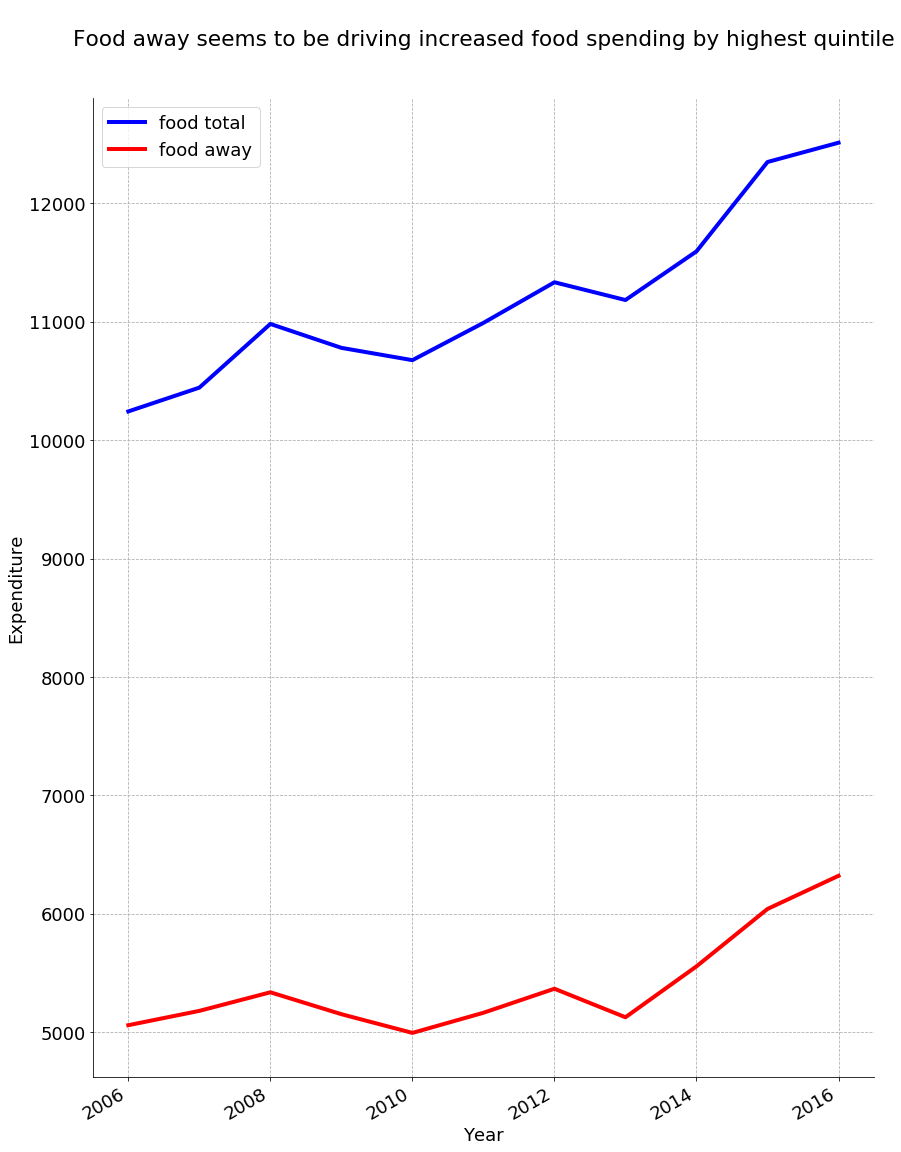

In [49]:
# setting x axis 
x = food_df_sub.index

# creating the chart
fig, ax = plt.subplots(figsize = (14,20))

# creating several lines
# food
ax.plot(x, food_df_sub.value, 'b-',label = 'food total', linewidth=4)
# food away
ax.plot(x, food_away_df_sub.value, 'r-', label = 'food away', linewidth=4)


# setting the labels for the whole plot
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure')
ax.set_title("\nFood away seems to be driving increased food spending by highest quintile\n\n")

# tilting the dates on the x axis
fig.autofmt_xdate()

# removing clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# including grid
ax.grid(linestyle='--')

# displaying the legend
ax.legend()
#ax.set_ylim(0, 36000)

### Summary of the above:

We've found that, among the highest quintile, the highest trending items are Healthcare, Housing, and Food. In the charts to come, I'll take a look at expenditures across these three items over the course of three years (2014, 2015,2016)

## Capturing expenditure the following info by quintile for Healthcare, Housing, and Food:

+ Average annual expenditure by highest and lowest quintiles over past three years
+ Size of market for all quintiles in 2016

First, will capture data from excel spreadsheets on the BLS site

In [57]:
import openpyxl as xl            # allows us to work with excel workbooks

# Define locations for data and figures
data_dir = '../data/'
fig_dir = '../figs/'

In [51]:
!pwd

/Users/Athena/MSFS/Spring 2018/MSFS 607/Assignment Work Folder/Assignment 2/code


In [52]:
# Capture the base URL as a string
cex_base_url = 'https://www.bls.gov/cex/'

# Capture the file names as a list of strings
cex_end_url = ['2016/combined/quintile.xlsx', '2015/combined/quintile.xlsx', '2014/combined/quintile.xlsx']

# File name I want, since the above has a bunch of '/'s
cex_file = ['2016quintile.xlsx', '2015quintile.xlsx', '2014quintile.xlsx']


cex_base_url, cex_end_url, cex_file

('https://www.bls.gov/cex/',
 ['2016/combined/quintile.xlsx',
  '2015/combined/quintile.xlsx',
  '2014/combined/quintile.xlsx'],
 ['2016quintile.xlsx', '2015quintile.xlsx', '2014quintile.xlsx'])

In [53]:
cex_urls = [cex_base_url+f for f in cex_end_url]

cex_urls

['https://www.bls.gov/cex/2016/combined/quintile.xlsx',
 'https://www.bls.gov/cex/2015/combined/quintile.xlsx',
 'https://www.bls.gov/cex/2014/combined/quintile.xlsx']

In [54]:
for u in cex_urls:
    !echo $u

https://www.bls.gov/cex/2016/combined/quintile.xlsx
https://www.bls.gov/cex/2015/combined/quintile.xlsx
https://www.bls.gov/cex/2014/combined/quintile.xlsx


In [55]:
# Capture the workbook associated with each URL and deposit in the data directory
for i,u in enumerate(cex_urls):
    new_file = data_dir+cex_file[i]
    !curl -o $new_file $u
    !echo wget -o $new_file $u

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30881  100 30881    0     0   193k      0 --:--:-- --:--:-- --:--:--  239k
wget -o ../data/2016quintile.xlsx https://www.bls.gov/cex/2016/combined/quintile.xlsx
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30839  100 30839    0     0  90540      0 --:--:-- --:--:-- --:--:-- 91239
wget -o ../data/2015quintile.xlsx https://www.bls.gov/cex/2015/combined/quintile.xlsx
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30778  100 30778    0     0   235k      0 --:--:-- --:--:-- --:--:--  242k
wget -o ../data/2014quintile.xlsx https://www.bls.gov/cex/2014/combined/quintile.xlsx


In [55]:
!ls -la ../data/

total 480
drwxr-xr-x  10 Athena  staff     320 Feb  9 23:26 .
drwxr-xr-x   8 Athena  staff     256 Feb  9 19:19 ..
-rw-r--r--@  1 Athena  staff    6148 Feb  9 19:06 .DS_Store
-rw-r--r--   1 Athena  staff   30778 Feb  9 19:09 2014quintile.xlsx
-rw-r--r--   1 Athena  staff   30839 Feb  9 19:09 2015quintile.xlsx
-rw-r--r--@  1 Athena  staff   30881 Feb  9 19:09 2016quintile.xlsx
-rw-r--r--@  1 Athena  staff   20475 Feb  5 12:56 Agg quintile spending (2016).xlsx
-rw-r--r--@  1 Athena  staff  109056 Feb  3 16:39 What each quintile spending on (2016).xls
-rw-r--r--@  1 Athena  staff     670 Feb  3 16:40 mean_annual_exp_quintile_2016.csv
-rw-r--r--@  1 Athena  staff     626 Feb  3 16:40 share_exp_quin_2016.csv


### Pulling data from the excel

I am looking for expenditures across all quintiles for Food, Housing, and Healthcare from 2014-2016

+ Food: \$C61:\$G61
+ Housing: \$C203:\$G203
+ Healthcare: \$C466:\$G466

I'll first start with food before moving on to Housing and Healthcare

In [64]:
# Load workbook
year2014 = xl.load_workbook('../data/2014quintile.xlsx')
year2015 = xl.load_workbook('../data/2015quintile.xlsx')
year2016 = xl.load_workbook('../data/2016quintile.xlsx')

# Print sheet names
#under25.sheetnames

In [65]:
print(cex_file)

['2016quintile.xlsx', '2015quintile.xlsx', '2014quintile.xlsx']


In [66]:
print(data_dir)

../data/


In [67]:
# Create empty lists to hold data
food_list = []
pop_list = []

# For each file...
for f in cex_file:
    # ... create empty sublists to hold each row of food and pop data ...
    food_row = []
    pop_row = []
    # ... capture the path to that file ...
    tmp_path = data_dir + f
    # ... load the file ...
    tmp_wb = xl.load_workbook(tmp_path)
    # ... isolate the first sheet ...
    tmp_sheet_name = tmp_wb.sheetnames[0]
    tmp_sheet = tmp_wb[tmp_sheet_name]
    # ... define cell objects for the food and pop data ...
    # (note that we are selecting the first element of the tuple immediately)
    foodObj = tmp_sheet['C61:G61'][0]
    popObj = tmp_sheet['C4:G4'][0]
    # ... and for each element in the cell objects ...
    for i in range(len(foodObj)):
        # ... throw the value of each cell in the relevant row list...
        food_row.append(foodObj[i].value)
        pop_row.append(popObj[i].value)
    # ... then throw each row in the parent list
    food_list.append(food_row)
    pop_list.append(pop_row)
    
# Define column and row names
cols = ['Lowest 20 Percent', 'Second 20 Percent', 'Third 20 Percent', 'Fourth 20 Percent', 'Highest 20 Percent']
rows = ['2016', '2015', '2014']

# Construct food and pop DataFrames
food = pd.DataFrame(food_list, columns = cols, index = rows)
pop = pd.DataFrame(pop_list, columns = cols, index = rows)

print('Average Annual Food Expenditures:\n', food)
print('\nPopulation Count:\n',pop)

Average Annual Food Expenditures:
       Lowest 20 Percent  Second 20 Percent  Third 20 Percent  \
2016             3862.0             4978.0            6224.0   
2015             3767.0             5022.0            5799.0   
2014             3667.0             4754.0            5992.0   

      Fourth 20 Percent  Highest 20 Percent  
2016             8436.0             12513.0  
2015             8165.0             12350.0  
2014             7779.0             11595.0  

Population Count:
       Lowest 20 Percent  Second 20 Percent  Third 20 Percent  \
2016            25884.0            26019.0           25905.0   
2015            25672.0            25562.0           25700.0   
2014            25364.0            25384.0           25499.0   

      Fourth 20 Percent  Highest 20 Percent  
2016            25900.0             25842.0  
2015            25730.0             25773.0  
2014            25349.0             25410.0  


In [69]:
pop.head()

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,25884.0,26019.0,25905.0,25900.0,25842.0
2015,25672.0,25562.0,25700.0,25730.0,25773.0
2014,25364.0,25384.0,25499.0,25349.0,25410.0


In [149]:
food = food.astype(int)
food.head()

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,3862,4978,6224,8436,12513
2015,3767,5022,5799,8165,12350
2014,3667,4754,5992,7779,11595


Plotting to see the following for food:

+ Avg. annual expenditure on food by quintile
+ Total expenditure by quintile

First we'll start with Avg. annual expenditure on food by the highest and lowest quintiles over the last 3 years

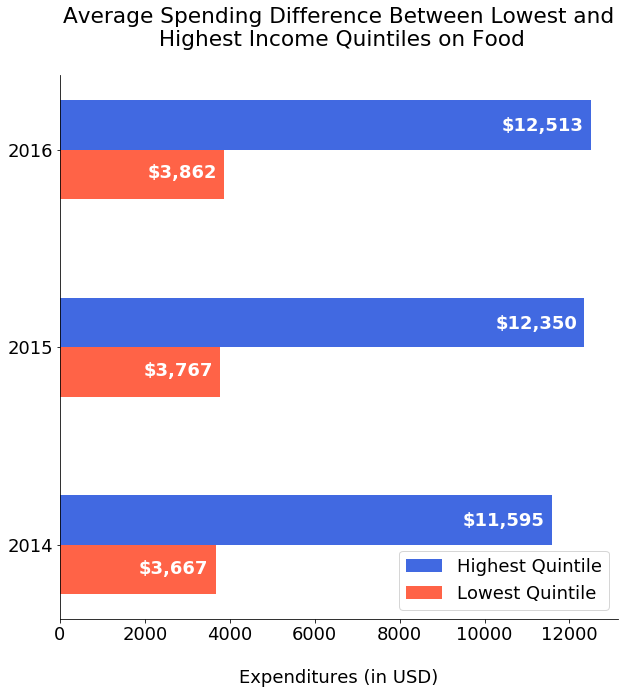

In [511]:
# create fig
fig, ax =plt.subplots(figsize=(10,10))

# setting bars
year = food.index
y_pos = np.arange(len(food.index))
width = .25
y1 = food['Highest 20 Percent']
y2 = food['Lowest 20 Percent']
#expenditure = diff_btw_extremes['factor_diff']

# building the chart
ax.barh(y_pos, y1, width, label='Highest Quintile', color = 'royalblue')
ax.barh(y_pos+width, y2, width, label='Lowest Quintile', color='tomato')

# adding value labels
# creating appropriately formatted strings to be included in the chart
y1_tmp = list(y1.apply(lambda x: '${:,.0f}'.format(x)))
y2_tmp = list(y2.apply(lambda x: '${:,.0f}'.format(x)))

# using for loop to insert the strings in the right position along each horizontal bar
for i, v in enumerate(y1):
    ax.text(v-2100, i+.03, str(y1_tmp[i]), color='white', fontweight='bold')
    
for i, v in enumerate(y2):
    ax.text(v-1800, i+0.27, str(y2_tmp[i]), color='white', fontweight='bold')

# setting the y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(year)

# placing 2016 on top
ax.invert_yaxis()

# more labels and titles
ax.set_xlabel('\nExpenditures (in USD)')
ax.set_title('Average Spending Difference Between Lowest and\n Highest Income Quintiles on Food\n')

# positioning the legend in the bottom right
ax.legend(loc=4)

# centering the y ticks between the blue and red bars
ax.set_yticks(y_pos + width / 2)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving fig
plt.savefig(fig_dir+'spending_diff_btw_quintiles_food.png', dpi=300, bbox_inches='tight')

Next we'll see the market size by quintile

In [213]:
# visualizing food df again
food

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,3862,4978,6224,8436,12513
2015,3767,5022,5799,8165,12350
2014,3667,4754,5992,7779,11595


In [214]:
# visualizing pop df again
pop

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,25884.0,26019.0,25905.0,25900.0,25842.0
2015,25672.0,25562.0,25700.0,25730.0,25773.0
2014,25364.0,25384.0,25499.0,25349.0,25410.0


In [226]:
# Creating a variable that houses 2016 expenditures on food and population for all quintiles
food_pop_data = {'Expenditure 2016': food.loc['2016'], 'Population 2016': pop.loc['2016']}

# Creating a dataframe 
food_pop = pd.DataFrame(data=food_pop_data, index=pop.columns).astype(int)
food_pop

,Expenditure 2016,Population 2016
Lowest 20 Percent,3862,25884
Second 20 Percent,4978,26019
Third 20 Percent,6224,25905
Fourth 20 Percent,8436,25900
Highest 20 Percent,12513,25842


In [227]:
# Calculating total expenditure by income quintile
# Population will be converted to millions (since it is in thousands), multiplied by average food expenditure
# and divided by 1 billion to yield market size in billions
food_pop['Food Market'] = (food_pop['Expenditure 2016'] * (food_pop['Population 2016']) * 1000) / 1000000000

In [230]:
food_pop

,Income Quintile,Expenditure 2016,Population 2016,Food Market
0,Lowest 20 Percent,3862,25884,99.964008
1,Second 20 Percent,4978,26019,129.522582
2,Third 20 Percent,6224,25905,161.232720
3,Fourth 20 Percent,8436,25900,218.492400
4,Highest 20 Percent,12513,25842,323.360946


In [229]:
# Adding an integer index (by pushing age into a normal variable) to ease plotting
food_pop = food_pop.reset_index().rename(columns={'index':'Income Quintile'})

In [231]:
# Adding formatted values for easy reading
# Add formatted values for easy reading
food_pop['2016 Food Expenditure ($)'] = food_pop['Expenditure 2016'].apply(lambda x: '${:,.0f}'.format(x))
food_pop['2016 Food Market ($bn)'] = food_pop['Food Market'].apply(lambda x: '${:,.1f}'.format(x))

food_pop

,Income Quintile,Expenditure 2016,Population 2016,Food Market,2016 Food Expenditure ($),2016 Food Market ($bn)
0,Lowest 20 Percent,3862,25884,99.964008,"$3,862",$100.0
1,Second 20 Percent,4978,26019,129.522582,"$4,978",$129.5
2,Third 20 Percent,6224,25905,161.232720,"$6,224",$161.2
3,Fourth 20 Percent,8436,25900,218.492400,"$8,436",$218.5
4,Highest 20 Percent,12513,25842,323.360946,"$12,513",$323.4


In [270]:
food_pop.dtypes

Income Quintile               object
Expenditure 2016               int64
Population 2016                int64
Food Market                  float64
2016 Food Expenditure ($)     object
2016 Food Market ($bn)        object
dtype: object

Now I'll create a bar chart with the Food Market by Quintile

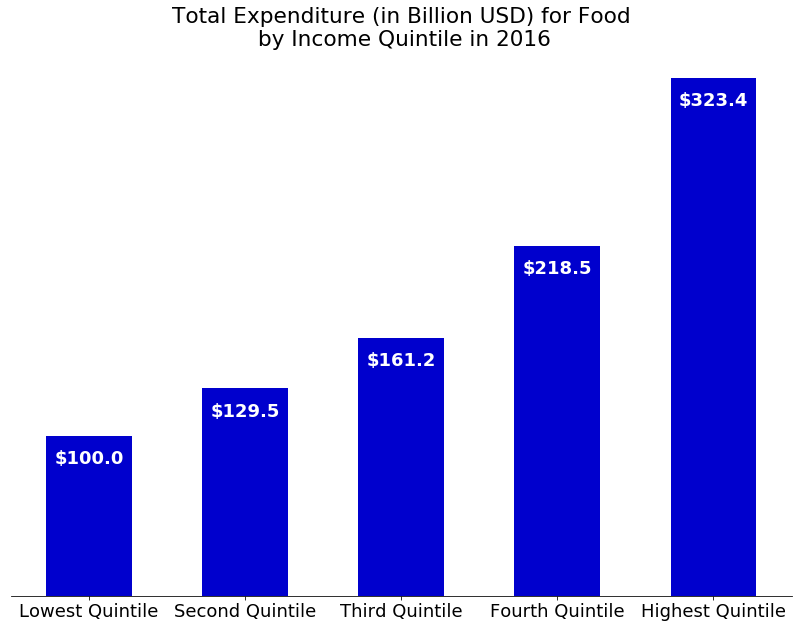

In [508]:
# Set number of bar charts
N = len(food_pop.index)

# Set bars for 2016 Food Market ($bn)
market_size = food_pop['Food Market']

# Setting locations and spacing for bars on x axis 
ind = np.arange(N)
width = 0.55

# Establish fig
fig, ax = plt.subplots(figsize=(14,10))
rects = ax.bar(ind, market_size, width, color='mediumblue')

# Labels for chart
ax.set_ylabel('Market Size (Billions of USD)')
ax.set_title('Total Expenditure (in Billion USD) for Food\n by Income Quintile in 2016')

xlabels = ['Lowest Quintile', 'Second Quintile', 'Third Quintile', 'Fourth Quintile', 'Highest Quintile']
ax.set_xticks(np.arange(len(xlabels)))
ax.set_xticklabels(xlabels)#, rotation = 45, ha="right")

# removing y axis to make the figure cleaner
ax.yaxis.set_visible(False)

# Setting value labels to fit into each bar
# First, create a list with the string values I want
food_market_list = food_pop['2016 Food Market ($bn)']

# Next, use for loop to insert values 
for i,rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height -20, str(food_market_list[i]), ha='center', va='bottom', \
            color='white', fontweight='bold')

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# save fig
plt.savefig(fig_dir+'food_expenditure_by_income_quintile.png', dpi=300, bbox_inches='tight')

### Repeating all the above for Housing and Healthcare

+ Housing: \$C203:\$G203
+ Healthcare: \$C466:\$G466

First, grabbing the average annual expenditure data on Housing and Healthcare over the last three years

In [305]:
# Create empty lists to hold data
housing_list = []
#pop_list = [] -- Not using pop list since it was pulled above in the food section
health_list = []

# For each file...
for f in cex_file:
    # ... create empty sublists to hold each row of food and pop data ...
    housing_row = []
    health_row = []  # replacing all pop values with health moving forward
    # ... capture the path to that file ...
    tmp_path = data_dir + f
    # ... load the file ...
    tmp_wb = xl.load_workbook(tmp_path)
    # ... isolate the first sheet ...
    tmp_sheet_name = tmp_wb.sheetnames[0]
    tmp_sheet = tmp_wb[tmp_sheet_name]
    # ... define cell objects for the food and pop data ...
    # (note that we are selecting the first element of the tuple immediately)
    housingObj = tmp_sheet['C203:G203'][0]
    healthObj = tmp_sheet['C466:G466'][0] 
    # ... and for each element in the cell objects ...
    for i in range(len(housingObj)):
        # ... throw the value of each cell in the relevant row list...
        housing_row.append(housingObj[i].value)
        health_row.append(healthObj[i].value)
    # ... then throw each row in the parent list
    housing_list.append(housing_row)
    health_list.append(health_row)
    
# Define column and row names
cols = ['Lowest 20 Percent', 'Second 20 Percent', 'Third 20 Percent', 'Fourth 20 Percent', 'Highest 20 Percent']
rows = ['2016', '2015', '2014']

# Construct food and pop DataFrames
housing = pd.DataFrame(housing_list, columns = cols, index = rows)
health = pd.DataFrame(health_list, columns = cols, index = rows)

print('Average Annual Housing Expenditures:\n', housing, '\n')
print('Average Annual Health Expenditures:\n', health)

Average Annual Housing Expenditures:
       Lowest 20 Percent  Second 20 Percent  Third 20 Percent  \
2016            10267.0            13552.0           16315.0   
2015             9890.0            12832.0           15809.0   
2014             9643.0            12508.0           15448.0   

      Fourth 20 Percent  Highest 20 Percent  
2016            20687.0             33653.0  
2015            20408.0             33027.0  
2014            19568.0             31812.0   

Average Annual Health Expenditures:
       Lowest 20 Percent  Second 20 Percent  Third 20 Percent  \
2016             2156.0             3528.0            4266.0   
2015             1930.0             3423.0            3965.0   
2014             1868.0             3252.0            4026.0   

      Fourth 20 Percent  Highest 20 Percent  
2016             5442.0              7677.0  
2015             5327.0              7048.0  
2014             5082.0              7219.0  


In [312]:
housing = housing.astype(int)
housing.head()

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,10267,13552,16315,20687,33653
2015,9890,12832,15809,20408,33027
2014,9643,12508,15448,19568,31812


In [313]:
health = health.astype(int)
health.head()

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,2156,3528,4266,5442,7677
2015,1930,3423,3965,5327,7048
2014,1868,3252,4026,5082,7219


In [314]:
pop = pop.astype(int)
pop.head()

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,25884,26019,25905,25900,25842
2015,25672,25562,25700,25730,25773
2014,25364,25384,25499,25349,25410




#### Repeating charts created above for food, this time with housing and healthcare

First, the chart for housing:

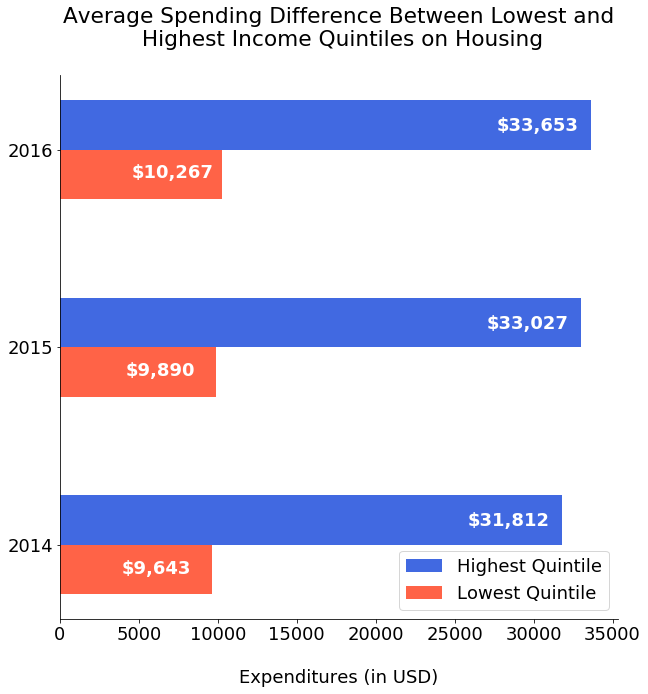

In [509]:
# create fig
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
year = housing.index
y_pos = np.arange(len(housing.index))
width = .25
y1 = housing['Highest 20 Percent']
y2 = housing['Lowest 20 Percent']

# building the chart
ax.barh(y_pos, y1, width, label='Highest Quintile', color = 'royalblue')
ax.barh(y_pos+width, y2, width, label='Lowest Quintile', color='tomato')

# adding value labels
# creating appropriately formatted strings to be included in the chart
y1_tmp = list(y1.apply(lambda x: '${:,.0f}'.format(x)))
y2_tmp = list(y2.apply(lambda x: '${:,.0f}'.format(x)))

# using for loop to insert the strings in the right position along each horizontal bar
for i, v in enumerate(y1):
    ax.text(v-6000, i+.03, str(y1_tmp[i]), color='white', fontweight='bold')
    
for i, v in enumerate(y2):
    ax.text(v-5700, i+0.27, str(y2_tmp[i]), color='white', fontweight='bold')

# y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(year)

# placing 2016 up top
ax.invert_yaxis()

# x axis labels
ax.set_xlabel('\nExpenditures (in USD)')

# figure title
ax.set_title('Average Spending Difference Between Lowest and\n Highest Income Quintiles on Housing\n')

# legend in the bottom right
ax.legend(loc=4)

# centering the y ticks
ax.set_yticks(y_pos + width / 2)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving the fig
plt.savefig(fig_dir+'spending_diff_btw_quintiles_housing.png', dpi=300, bbox_inches='tight')

Now moving on to creating the healthcare chart

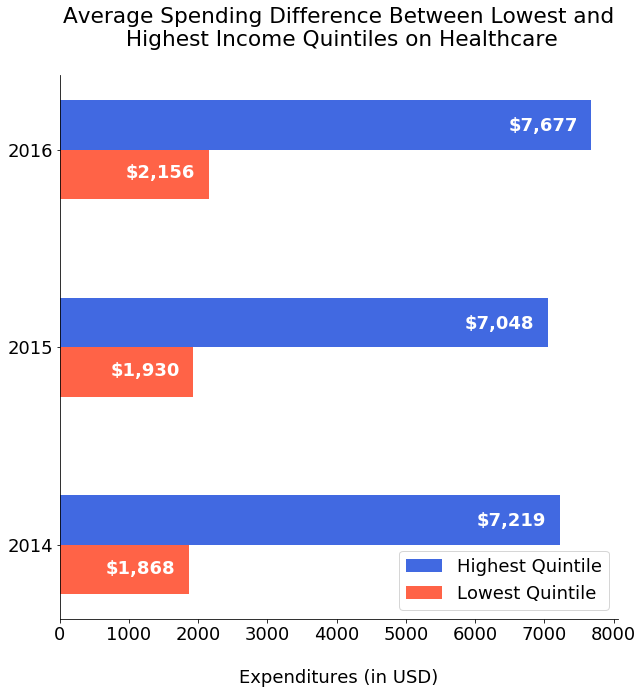

In [510]:
# create fig
fig, ax = plt.subplots(figsize=(10,10))

# setting bars
year = health.index
y_pos = np.arange(len(health.index))
width = .25
y1 = health['Highest 20 Percent']
y2 = health['Lowest 20 Percent']

# building the chart
ax.barh(y_pos, y1, width, label='Highest Quintile', color = 'royalblue')
ax.barh(y_pos+width, y2, width, label='Lowest Quintile', color='tomato')

# adding value labels
# creating appropriately formatted strings to be included in the chart
y1_tmp = list(y1.apply(lambda x: '${:,.0f}'.format(x)))
y2_tmp = list(y2.apply(lambda x: '${:,.0f}'.format(x)))

# using for loop to insert the strings in the right position along each horizontal bar
for i, v in enumerate(y1):
    ax.text(v-1200, i+.03, str(y1_tmp[i]), color='white', fontweight='bold')
    
for i, v in enumerate(y2):
    ax.text(v-1200, i+0.27, str(y2_tmp[i]), color='white', fontweight='bold')

# y labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(year)

# placing 2016 at the top
ax.invert_yaxis()

# x axis label
ax.set_xlabel('\nExpenditures (in USD)')

# figure title
ax.set_title('Average Spending Difference Between Lowest and\n Highest Income Quintiles on Healthcare\n')

# legend in the bottom right
ax.legend(loc=4)

# centering the y ticks
ax.set_yticks(y_pos + width / 2)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# saving the fig
plt.savefig(fig_dir+'spending_diff_btw_quintiles_health.png', dpi=300, bbox_inches='tight')

Finally, creating market size charts for Housing and Healthcare

In [354]:
housing

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,10267,13552,16315,20687,33653
2015,9890,12832,15809,20408,33027
2014,9643,12508,15448,19568,31812


In [355]:
health

,Lowest 20 Percent,Second 20 Percent,Third 20 Percent,Fourth 20 Percent,Highest 20 Percent
2016,2156,3528,4266,5442,7677
2015,1930,3423,3965,5327,7048
2014,1868,3252,4026,5082,7219


In [356]:
# Creating a variable that contains 2016 expenditures on housing and population for all quintiles
housing_pop_data = {'Expenditure': housing.loc['2016'], 'Population': pop.loc['2016']}

# Creating a dataframe 
housing_pop = pd.DataFrame(data=housing_pop_data, index=pop.columns).astype(int)
housing_pop

,Expenditure,Population
Lowest 20 Percent,10267,25884
Second 20 Percent,13552,26019
Third 20 Percent,16315,25905
Fourth 20 Percent,20687,25900
Highest 20 Percent,33653,25842


In [357]:
# Repeating the above for healthcare
# Creating a variable that contains 2016 expenditures on housing and population for all quintiles
health_pop_data = {'Expenditure': health.loc['2016'], 'Population': pop.loc['2016']}

# Creating a dataframe 
health_pop = pd.DataFrame(data=health_pop_data, index=pop.columns).astype(int)
health_pop

,Expenditure,Population
Lowest 20 Percent,2156,25884
Second 20 Percent,3528,26019
Third 20 Percent,4266,25905
Fourth 20 Percent,5442,25900
Highest 20 Percent,7677,25842


In [358]:
# Calculating total expenditure by income quintile
# Population will be converted to millions (since it is in thousands), multiplied by average food expenditure
# and divided by 1 billion to yield market size in billions
housing_pop['Housing Market'] = (housing_pop['Expenditure'] * (housing_pop['Population']) * 1000) / 1000000000
housing_pop

,Expenditure,Population,Housing Market
Lowest 20 Percent,10267,25884,265.751028
Second 20 Percent,13552,26019,352.609488
Third 20 Percent,16315,25905,422.640075
Fourth 20 Percent,20687,25900,535.793300
Highest 20 Percent,33653,25842,869.660826


In [359]:
# Calculating total expenditure by income quintile
# Population will be converted to millions (since it is in thousands), multiplied by average food expenditure
# and divided by 1 billion to yield market size in billions
health_pop['Health Market'] = (health_pop['Expenditure'] * (health_pop['Population']) * 1000) / 1000000000
health_pop

,Expenditure,Population,Health Market
Lowest 20 Percent,2156,25884,55.805904
Second 20 Percent,3528,26019,91.795032
Third 20 Percent,4266,25905,110.510730
Fourth 20 Percent,5442,25900,140.947800
Highest 20 Percent,7677,25842,198.389034


In [ ]:
# Adding an integer index (by pushing age into a normal variable) to ease plotting
health_pop = health_pop.reset_index().rename(columns={'index':'Income Quintile'})
housing_pop = housing_pop.reset_index().rename(columns={'index':'Income Quintile'})

In [362]:
# Adding formatted values for easy reading
# Add formatted values for easy reading
housing_pop['2016 Housing Expenditure'] = housing_pop['Expenditure'].apply(lambda x: '${:,.0f}'.format(x))
housing_pop['2016 Housing Market ($bn)'] = housing_pop['Housing Market'].apply(lambda x: '${:,.1f}'.format(x))

housing_pop

,Expenditure,Population,Housing Market,2016 Housing Expenditure,2016 Housing Market ($bn)
Lowest 20 Percent,10267,25884,265.751028,"$10,267",$265.8
Second 20 Percent,13552,26019,352.609488,"$13,552",$352.6
Third 20 Percent,16315,25905,422.640075,"$16,315",$422.6
Fourth 20 Percent,20687,25900,535.793300,"$20,687",$535.8
Highest 20 Percent,33653,25842,869.660826,"$33,653",$869.7


In [363]:
# Adding formatted values for easy reading
# Add formatted values for easy reading
health_pop['2016 Health Expenditure'] = health_pop['Expenditure'].apply(lambda x: '${:,.0f}'.format(x))
health_pop['2016 Health Market ($bn)'] = health_pop['Health Market'].apply(lambda x: '${:,.1f}'.format(x))

health_pop

,Expenditure,Population,Health Market,2016 Health Expenditure,2016 Health Market ($bn)
Lowest 20 Percent,2156,25884,55.805904,"$2,156",$55.8
Second 20 Percent,3528,26019,91.795032,"$3,528",$91.8
Third 20 Percent,4266,25905,110.510730,"$4,266",$110.5
Fourth 20 Percent,5442,25900,140.947800,"$5,442",$140.9
Highest 20 Percent,7677,25842,198.389034,"$7,677",$198.4


In [365]:
housing_pop.dtypes

Expenditure                    int64
Population                     int64
Housing Market               float64
2016 Housing Expenditure      object
2016 Housing Market ($bn)     object
dtype: object

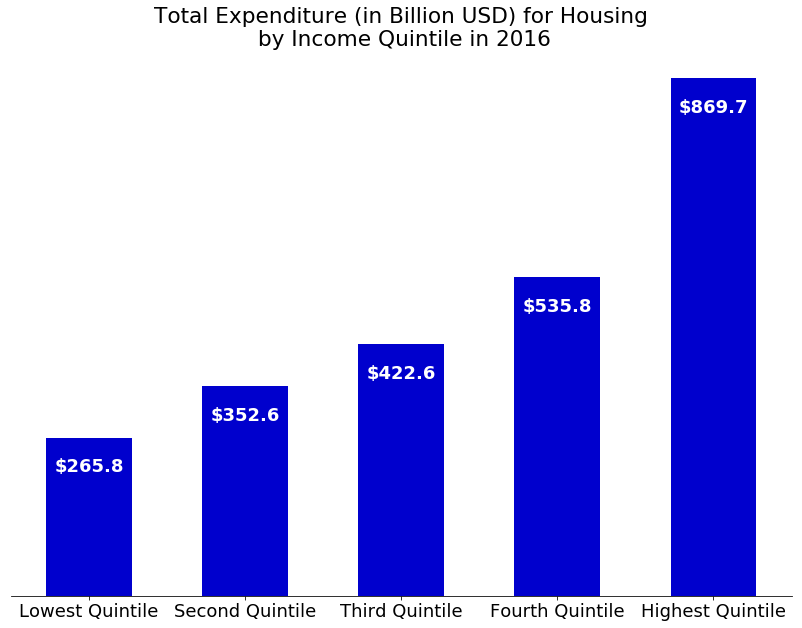

In [506]:
# Set number of bar charts
N = len(housing_pop.index)

# Set bars for 2016 Housing Market
market_size = housing_pop['Housing Market']

# Setting locations and spacing for bars on x axis 
ind = np.arange(N)
width = 0.55

# Establish fig
fig, ax = plt.subplots(figsize=(14,10))
rects = ax.bar(ind, market_size, width, color='mediumblue')

# Labels for chart
ax.set_ylabel('Market Size (billions of USD)')
ax.set_title('Total Expenditure (in Billion USD) for Housing\n by Income Quintile in 2016')

xlabels = ['Lowest Quintile', 'Second Quintile', 'Third Quintile', 'Fourth Quintile', 'Highest Quintile']
ax.set_xticks(np.arange(len(xlabels)))
ax.set_xticklabels(xlabels)#, rotation = 45, ha="right")

# Setting value labels to fit into each bar
# First, create a list with the string values I want
housing_market_list = housing_pop['2016 Housing Market ($bn)']

# Next, use for loop to insert values inside each bar
for i,rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height -65, str(housing_market_list[i]), ha='center', va='bottom', \
            color='white', fontweight='bold')

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

# save fig
plt.savefig(fig_dir+'housing_expenditure_by_income_quintile_2016.png', dpi=300, bbox_inches='tight')

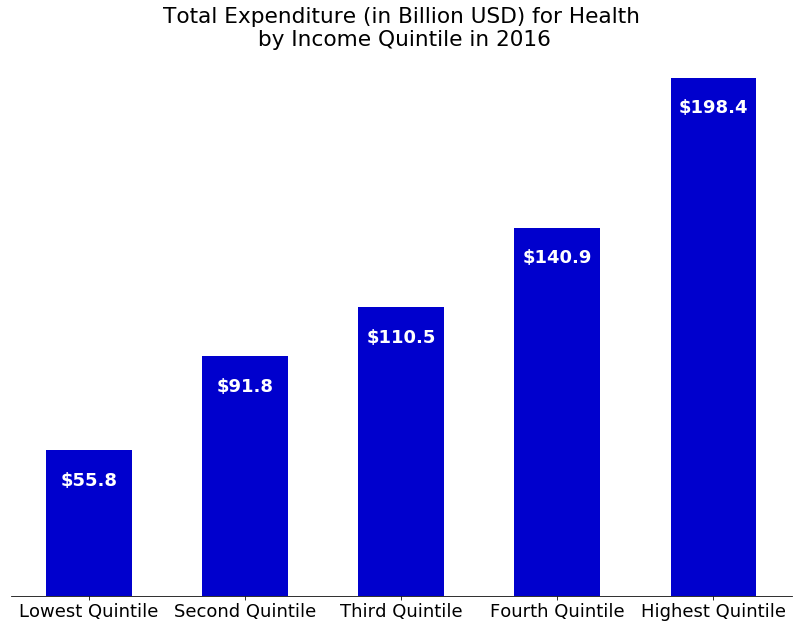

In [507]:
# Set number of bar charts
N = len(health_pop.index)

# Set bars for 2016 Health Market
market_size = health_pop['Health Market']

# Setting locations and spacing for bars on x axis 
ind = np.arange(N)
width = 0.55

# Establish fig
fig, ax = plt.subplots(figsize=(14,10))
rects = ax.bar(ind, market_size, width, color='mediumblue')

# Labels for chart
ax.set_ylabel('Market Size (billions of USD)')
ax.set_title('Total Expenditure (in Billion USD) for Health\n by Income Quintile in 2016')

xlabels = ['Lowest Quintile', 'Second Quintile', 'Third Quintile', 'Fourth Quintile', 'Highest Quintile']
ax.set_xticks(np.arange(len(xlabels)))
ax.set_xticklabels(xlabels)#, rotation = 45, ha="right")

# Setting value labels to fit into each bar
# First, create a list with the string values I want
health_market_list = health_pop['2016 Health Market ($bn)']

# Next, use for loop to insert values inside each bar 
for i,rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height -15, str(health_market_list[i]), ha='center', va='bottom', \
            color='white', fontweight='bold')

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

# save fig
plt.savefig(fig_dir+'health_expenditure_by_income_quintile_2016.png', dpi=300, bbox_inches='tight')

## Last thing to do is check the tax impact

I created an excel document titled tax_impact.xlsx in the ../data/ repo, and it will be included in the slides. The tax savings are as follows:

+ Lowest Quintile: 0
+ Highest Quintile: 6306.51

The share of income spent on food and housing by the highest quintile is as follows:
+ Food: 11.2%
+ Housing: 30.%

Below, we'll assume the 6,306.51 USD in saving is split into these two items based on current spending proportions:

In [459]:
food_boost = 6306.51 * .112
housing_boost = 6306.51 * .3

Then we'll multiply this avg. saving across the population and create two bar charts showing the change

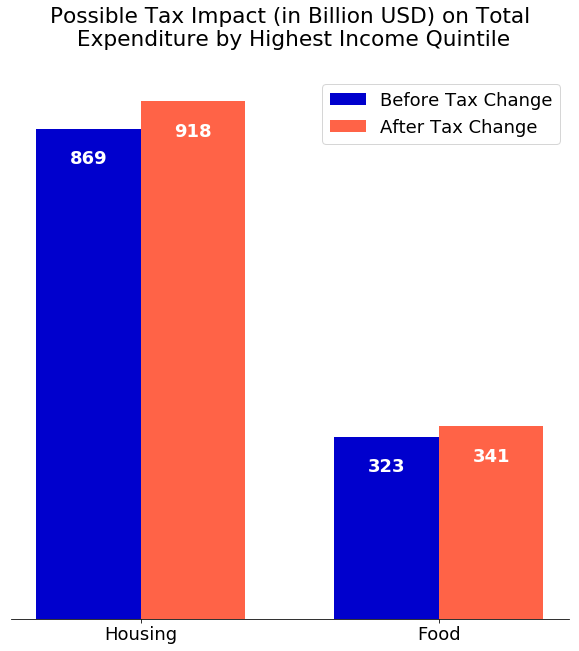

In [499]:
# Set bars for 2016 Market for housing and food without tax saving and with tax saving
housing_market_highestQ = housing_pop.iloc[4,2]
housing_market_highestQ_with_boost = housing_pop.iloc[4,2] + ((housing_pop.iloc[4,1] * housing_boost * 1000) / 1000000000)
food_market_higestQ =food_pop.iloc[4,3]
food_market_highestQ_with_boost = food_pop.iloc[4,3] + ((food_pop.iloc[4,2] * food_boost * 1000) / 1000000000)

# Creating two groups of bars to compare housing and food before and after tax change
N = 2
pre_tax_change_bars = (housing_market_highestQ, food_market_higestQ)
post_tax_change_bars = (housing_market_highestQ_with_boost, food_market_highestQ_with_boost)

# Setting locations and spacing for bars on x axis 
ind = np.arange(N)
width = .35

# Establish fig
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(ind, pre_tax_change_bars, width, color='mediumblue')
rects2 = ax.bar(ind+width, post_tax_change_bars, width, color='tomato')

# Labels for chart
ax.set_ylabel('Total Expenditure (billions of USD)')
ax.set_title('Possible Tax Impact (in Billion USD) on Total\n Expenditure by Highest Income Quintile\n')
xlabels = ['Housing', 'Food']
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(xlabels)#, rotation = 45, ha="right")
ax.legend((rects1[0], rects2[0]), ('Before Tax Change', 'After Tax Change'))

# Setting function to fit into each bar
# The function below will attach a text label above each bar displaying its height
# This function can be referenced at the following url: https://matplotlib.org/examples/api/barchart_demo.html 
def autolabel(rects):    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height-70,
                '%d' % int(height), ha='center', va='bottom', color='white', fontweight='bold')

# Use function above to insert value labels
autolabel(rects1)
autolabel(rects2)

# clearing some clutter
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

# save fig
plt.savefig(fig_dir+'tax_impact.png', dpi=300, bbox_inches='tight')